In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

[axis](#Axis)
[figure](#Figure)

## A Simple Example

Matplotlib graphs your data on **Figures** (e.g., windows, Jupyter widgets, etc.), each of which can contain one or more **Axes**, an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, x-y-z in a 3D plot, etc). The simplest way of creating a Figure with an Axes is using `pyplot.subplots`. We can then use Axes.plot to draw some data on the Axes:

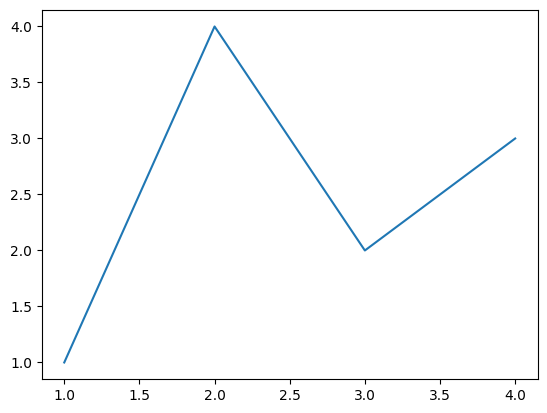

In [4]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.

## Parts of Figure

![image](./anatomy.webp)

### Figure

The whole figure. The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc), and even nested subfigures.

The easiest way to create a new Figure is with pyplot:

<Figure size 640x480 with 0 Axes>

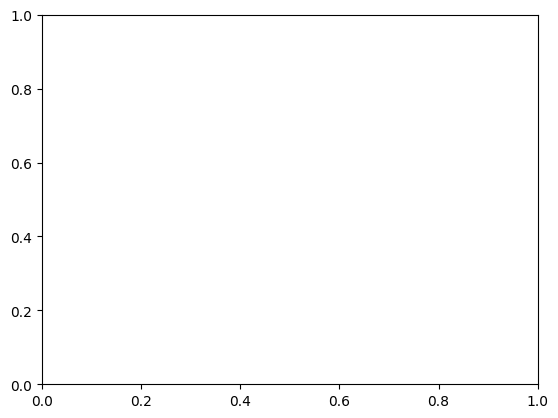

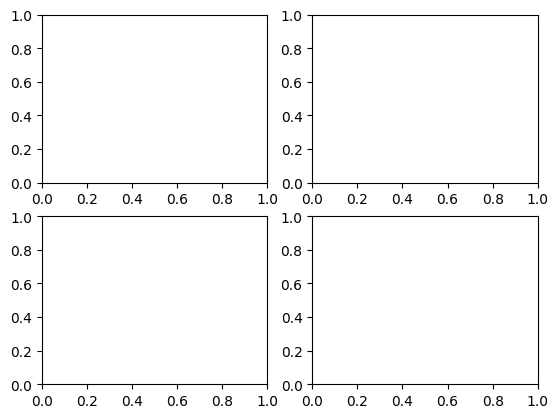

In [5]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

### Axes 

An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each Axes also has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

The Axes class and its member functions are the primary entry point to working with the OOP interface, and have most of the plotting methods defined on them (e.g. ax.plot(), shown above, uses the plot method)

### Axis

These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

### Artist 

These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

## Coding Style 

As noted above, there are essentially two ways to use Matplotlib:

Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").

Rely on pyplot to automatically create and manage the Figures and Axes, and use pyplot functions for plotting.


### OO style 

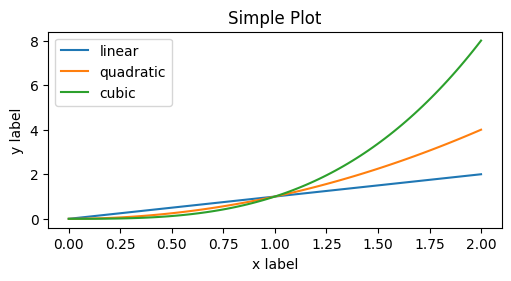

In [6]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), constrained_layout=True)
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

### pyplot (scripting) style

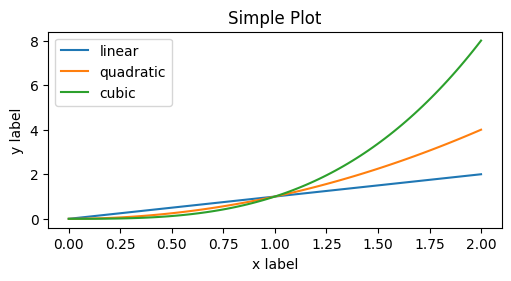

In [10]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), constrained_layout=True)
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()


## Styling Artists 

Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a "setter" on the Artist. In the plot below we manually set the color, linewidth, and linestyle of the Artists created by plot, and we set the linestyle of the second line after the fact with set_linestyle

In [ ]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':');

### Color

Matplotlib has a very flexible array of colors that are accepted for most Artists; see the colors tutorial for a list of specifications. Some Artists will take multiple colors. i.e. for a scatter plot, the edge of the markers can be different colors from the interior:

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k');

### Linewidths, linestyles, and markersizes

Line widths are typically in typographic points (1 pt = 1/72 inch) and available for Artists that have stroked lines. Similarly, stroked lines can have a linestyle. See the [linestyles example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).

Marker size depends on the method being used. plot specifies markersize in points, and is generally the "diameter" or width of the marker. scatter specifies markersize as approximately proportional to the visual area of the marker. There is an array of markerstyles available as string codes (see markers), or users can define their own MarkerStyle (see [Marker reference](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html)):

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

## Labeling Plots

### Axes labels and text

set_xlabel, set_ylabel, and set_title are used to add text in the indicated locations (see Text in Matplotlib Plots for more discussion). Text can also be directly added to plots using text:

In [ ]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=1, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);

## Axis scales and ticks
Each Axes has two (or three) Axis objects representing the x- and y-axis. These control the scale of the Axis, the tick locators and the tick formatters. 

### Scale

In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale. 

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

### Tick locators and formatters
Each Axis has a tick locator and formatter that choose where along the Axis objects to put tick marks. A simple interface to this is set_xticks:

In [ ]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks');

## Annotations

We can also annotate points on a plot, often by connecting an arrow pointing to xy, to a piece of text at xytext:

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))
# ax.annotate('local min', xy=(1.5, -1), xytext=(2, -1.5), 
#             arrowprops=dict(facecolor='red'))
ax.set_ylim(-2, 2);

In this basic example, both xy and xytext are in data coordinates. There are a variety of other coordinate systems one can choose -- see Basic annotation and Advanced Annotations for details. More examples also can be found in Annotating Plots.

## Legends

Often we want to identify lines or markers with a Axes.legend:

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend();